#Section 1: Importing Libraries
This section imports all necessary libraries for data manipulation, visualization,
machine learning models, preprocessing, and hyperparameter tuning.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle # For saving models and other objects
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import randint, uniform
# Set a random state for reproducibility across different runs
RANDOM_STATE = 42

# Section 2: Load the Data
This section loads the loan dataset from the 'loan.csv' file into a pandas DataFrame.

In [ ]:
try:
    df = pd.read_csv("/loan.csv")
    print("Dataset loaded successfully.")
    print("First 5 rows of the dataset:")
    print(df.head())
    print("\nDataset Info:")
    df.info()
except FileNotFoundError:
    print("Error: 'loan.csv' not found. Please ensure the file is in the correct directory.")
    exit() # Exit if the dataset cannot be loaded

Dataset loaded successfully.
First 5 rows of the dataset:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1       

# Section 3: Exploratory Data Analysis (EDA)

# Section 3.1: Check for Null Values and Visualize
This part identifies missing values in the dataset and visualizes their distribution
using a heatmap.


Number of null values per column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


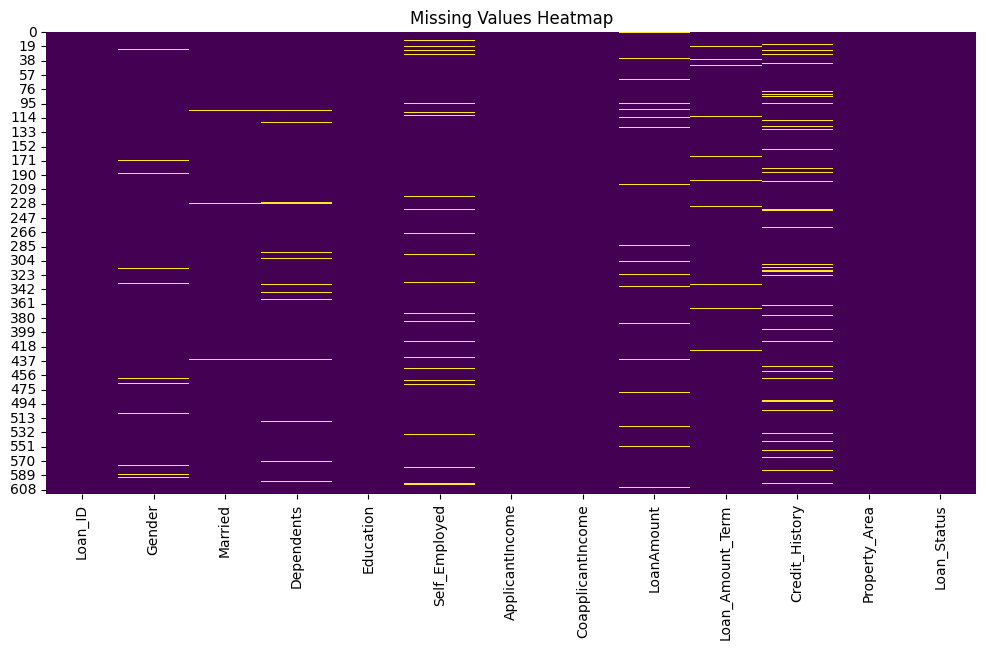

Missing values visualized using a heatmap.


In [ ]:
print("Number of null values per column:")
print(df.isnull().sum())

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()
print("Missing values visualized using a heatmap.")

# Section 3.2: Check for Far Values (Outliers) and Visualize
This part uses box plots to visualize potential outliers in numerical columns.

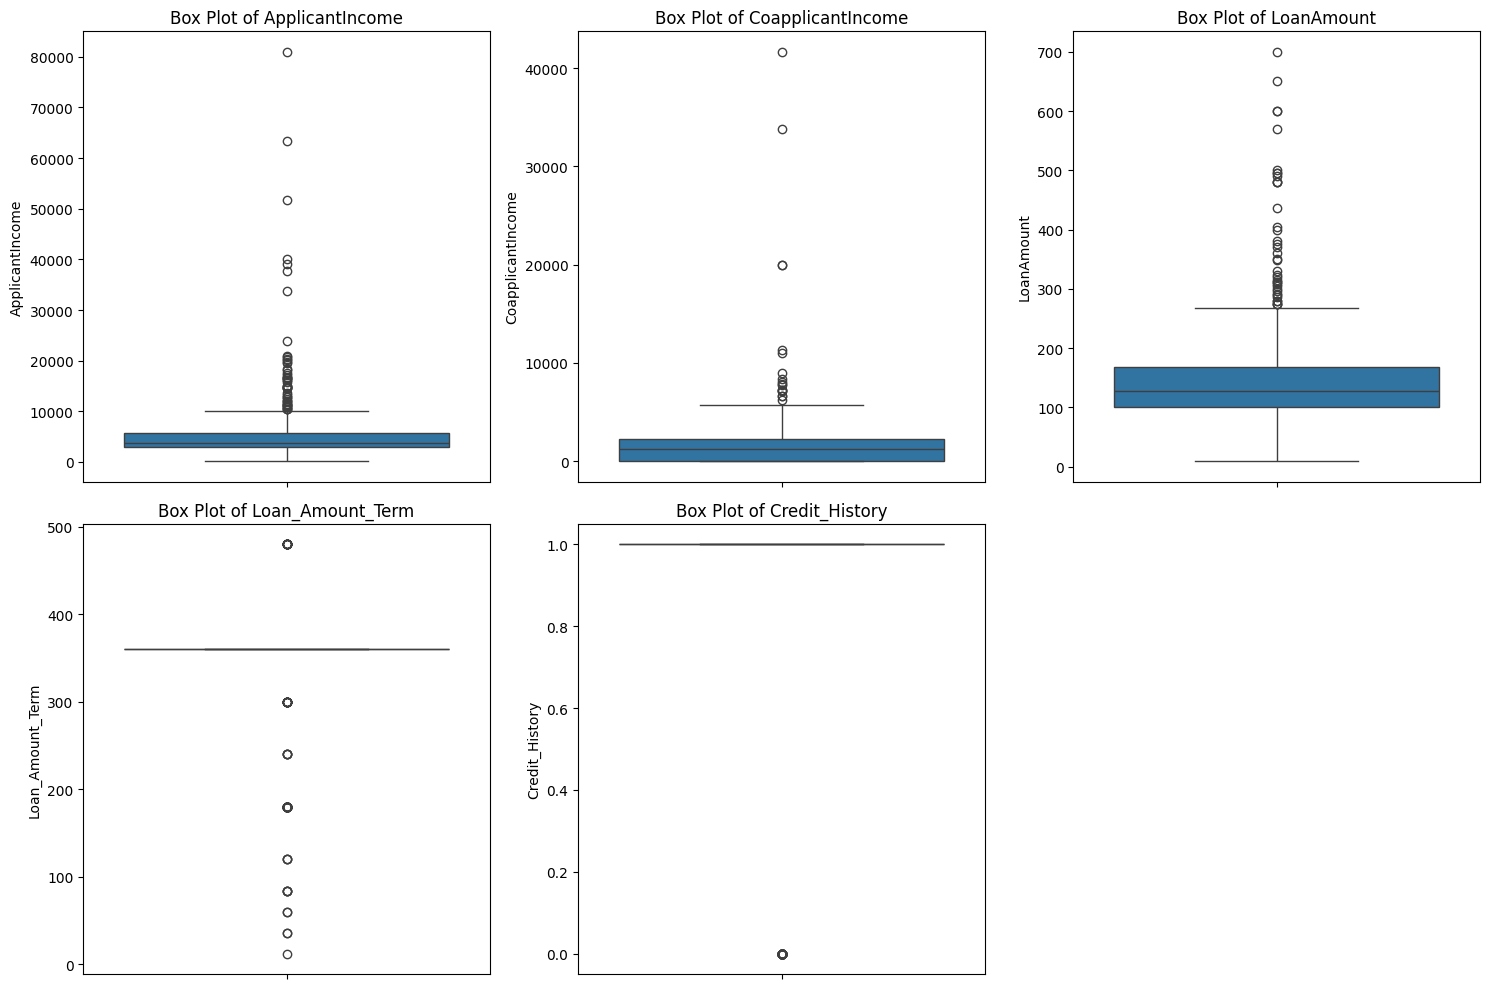

Outliers in numerical columns visualized using box plots.


In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Exclude 'Loan_ID' if it's still numerical before dropping
if 'Loan_ID' in numerical_cols:
    numerical_cols.remove('Loan_ID')
if 'Loan_Status' in numerical_cols:
    numerical_cols.remove('Loan_Status') # Exclude target variable from outlier check

if numerical_cols:
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_cols):
        plt.subplot(2, (len(numerical_cols) + 1) // 2, i + 1) # Adjust subplot grid dynamically
        sns.boxplot(y=df[col])
        plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()
    print("Outliers in numerical columns visualized using box plots.")
else:
    print("No numerical columns found for outlier analysis (excluding Loan_ID and Loan_Status).")

# Section 3.3: Find Unique Values in All Columns
This part iterates through each column to display its unique values and their counts.

In [ ]:
for column in df.columns:
    print(f"\nUnique values in '{column}':")
    if df[column].nunique() < 50: # Display all unique values if less than 50
        print(df[column].value_counts())
    else: # Otherwise, just show the count of unique values
        print(f"Too many unique values to display: {df[column].nunique()}")


Unique values in 'Loan_ID':
Too many unique values to display: 614

Unique values in 'Gender':
Gender
Male      489
Female    112
Name: count, dtype: int64

Unique values in 'Married':
Married
Yes    398
No     213
Name: count, dtype: int64

Unique values in 'Dependents':
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

Unique values in 'Education':
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Unique values in 'Self_Employed':
Self_Employed
No     500
Yes     82
Name: count, dtype: int64

Unique values in 'ApplicantIncome':
Too many unique values to display: 505

Unique values in 'CoapplicantIncome':
Too many unique values to display: 287

Unique values in 'LoanAmount':
Too many unique values to display: 203

Unique values in 'Loan_Amount_Term':
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

Unique v

# Section 4: Handle Missing Values
This section fills missing values using appropriate strategies (mode, median).


In [ ]:
# Fill 'Gender', 'Married', 'Self_Employed' with mode (most frequent value)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

# 'Dependents' has '3+' which needs to be handled before converting to numeric.
# Replace '3+' with '3', then convert to float, then fill missing with mean and convert to int.
df['Dependents'] = df['Dependents'].replace('3+', '3').astype(float)
df['Dependents'].fillna(df['Dependents'].mean(), inplace=True)
df['Dependents'] = df['Dependents'].astype(int)

# Fill 'LoanAmount' with median (less sensitive to outliers than mean)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Fill 'Loan_Amount_Term' and 'Credit_History' with mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

print("Missing values filled successfully.")
print("Null values after filling:")
print(df.isnull().sum())

Missing values filled successfully.
Null values after filling:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


/tmp/ipython-input-24-2436101145.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/tmp/ipython-input-24-2436101145.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

# Section 5: Encoding Categorical Features
 This section converts categorical text data into numerical format that machine learning

 models can understand

In [ ]:
# Using map for binary and ordinal encoding
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0}).astype(int)
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0}).astype(int)
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0}).astype(int)
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0}).astype(int)
df['Property_Area'] = df['Property_Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0}).astype(int)
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0}).astype(int)

print("Categorical features encoded successfully.")
print("First 5 rows after encoding:")
print(df.head())

Categorical features encoded successfully.
First 5 rows after encoding:
    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          1              0   
1  LP001003       1        1           1          1              0   
2  LP001005       1        1           0          1              1   
3  LP001006       1        1           0          0              0   
4  LP001008       1        0           0          1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2

# Section 6: Drop Irrelevant Columns
This section removes columns that are not useful for the prediction task.

In [ ]:
# 'Loan_ID' is just an identifier and does not contribute to the prediction.
df = df.drop('Loan_ID', axis=1)
print("'Loan_ID' column dropped.")
print("Columns after dropping 'Loan_ID':", df.columns.tolist())

'Loan_ID' column dropped.
Columns after dropping 'Loan_ID': ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


# Section 7: Train-Test Split and Scaling
 This section splits the data into training and testing sets and scales the features

to normalize their range.

In [ ]:
# Define features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
print(f"Data split into training (80%) and testing (20%) sets.")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

# Initialize StandardScaler and fit on training data, then transform both train and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features scaled using StandardScaler.")

Data split into training (80%) and testing (20%) sets.
X_train shape: (491, 11), X_test shape: (123, 11)
Features scaled using StandardScaler.


# Section 8: Define Classifiers Dictionary
 This section defines a dictionary of various classification algorithms to be evaluated.

In [ ]:
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=RANDOM_STATE, max_iter=200),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'Support Vector Machine': SVC(random_state=RANDOM_STATE),
    'K-Nearest Neighbors': KNeighborsClassifier()
}
print("Classifiers dictionary created.")

Classifiers dictionary created.


# Section 9: Initial Classifier Evaluation
 This section trains and evaluates each classifier using the scaled data,

 printing performance metrics and visualizing predictions.



--- Evaluating Logistic Regression ---
Logistic Regression Accuracy: 0.7886
Confusion Matrix:
[[18 25]
 [ 1 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



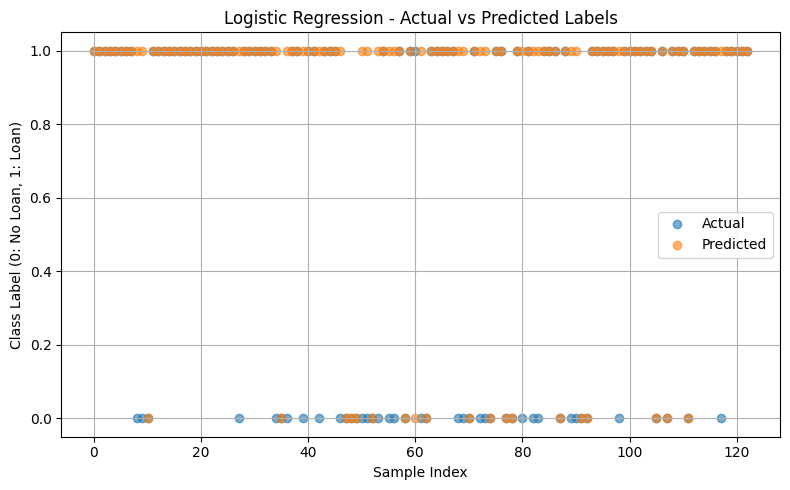


--- Evaluating Decision Tree ---
Decision Tree Accuracy: 0.6829
Confusion Matrix:
[[22 21]
 [18 62]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.51      0.53        43
           1       0.75      0.78      0.76        80

    accuracy                           0.68       123
   macro avg       0.65      0.64      0.65       123
weighted avg       0.68      0.68      0.68       123



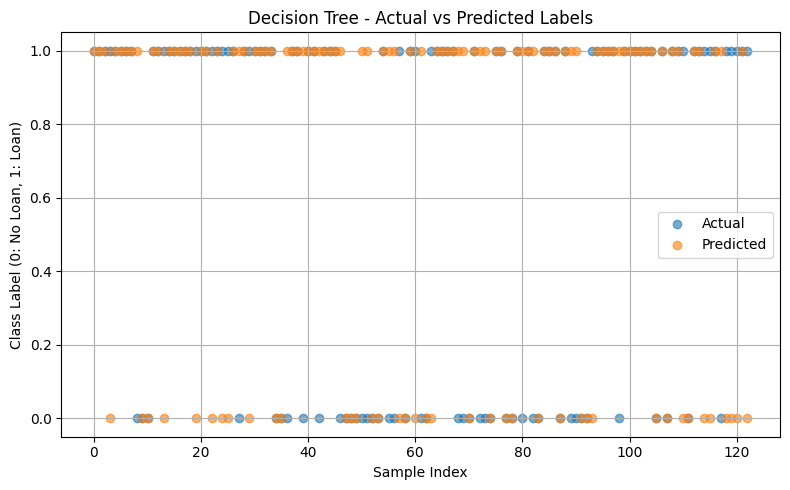


--- Evaluating Random Forest ---
Random Forest Accuracy: 0.7642
Confusion Matrix:
[[18 25]
 [ 4 76]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123



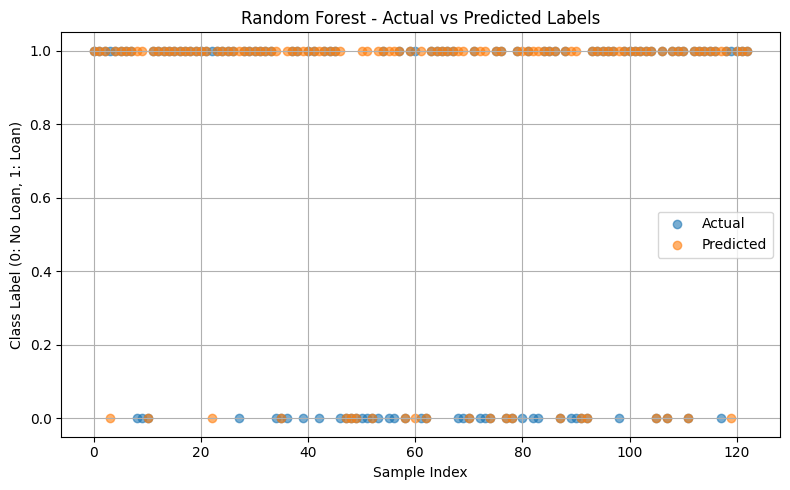


--- Evaluating Support Vector Machine ---
Support Vector Machine Accuracy: 0.7886
Confusion Matrix:
[[18 25]
 [ 1 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



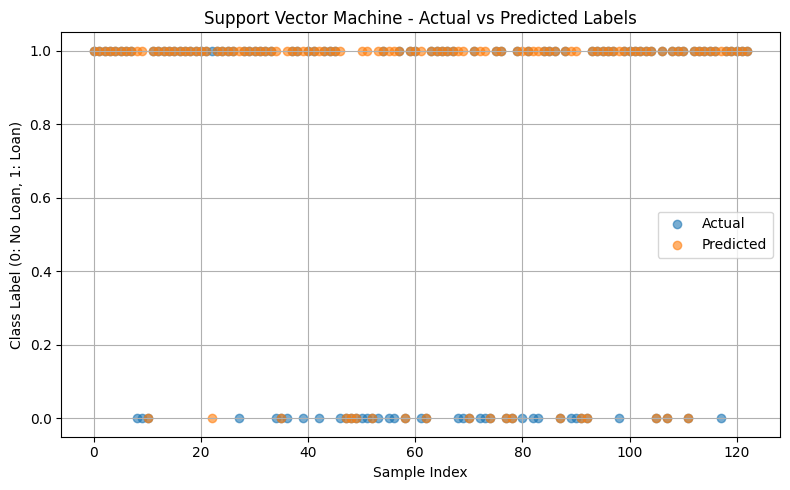


--- Evaluating K-Nearest Neighbors ---
K-Nearest Neighbors Accuracy: 0.7561
Confusion Matrix:
[[17 26]
 [ 4 76]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.40      0.53        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.78      0.67      0.68       123
weighted avg       0.77      0.76      0.73       123



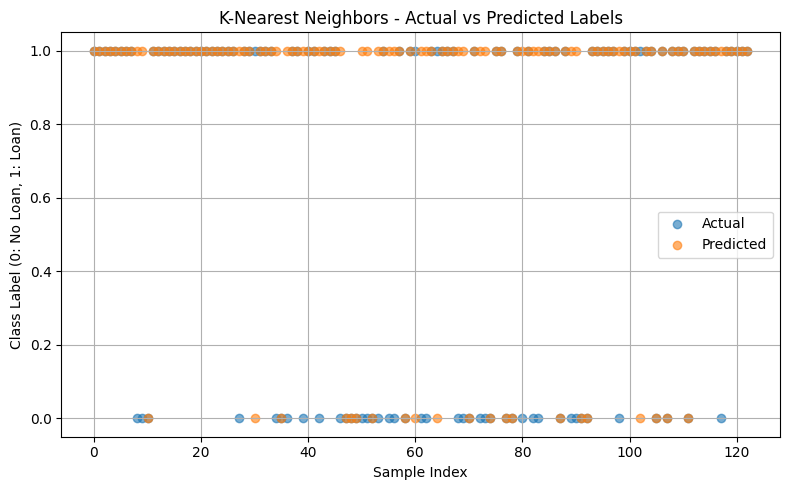

In [ ]:
initial_accuracies = {}

for name, clf in classifiers.items():
    print(f"\n--- Evaluating {name} ---")
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    initial_accuracies[name] = acc # Store accuracy for later selection
    print(f"{name} Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Scatter plot of predicted labels vs true labels
    plt.figure(figsize=(8, 5))
    plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.6)
    plt.scatter(range(len(y_pred)), y_pred, label='Predicted', alpha=0.6)
    plt.title(f'{name} - Actual vs Predicted Labels')
    plt.xlabel('Sample Index')
    plt.ylabel('Class Label (0: No Loan, 1: Loan)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Section 10: Select Best 4 Classifiers
 Based on the initial evaluation, the top 4 performing classifiers are selected

In [ ]:
sorted_classifiers = sorted(initial_accuracies.items(), key=lambda item: item[1], reverse=True)
best_4_classifiers_names = [name for name, acc in sorted_classifiers[:4]]
print(f"Top 4 classifiers based on initial accuracy: {best_4_classifiers_names}")
best_4_classifiers = {name: classifiers[name] for name in best_4_classifiers_names}

Top 4 classifiers based on initial accuracy: ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'K-Nearest Neighbors']


# Section 11: Pipeline for Feature Selection and Hyperparameter Tuning
 This section creates a pipeline for each of the top 4 classifiers,

 performs feature selection using RFE, and tunes hyperparameters using RandomizedSearchCV.


--- Section 11: Pipeline for Feature Selection and Hyperparameter Tuning ---

--- Tuning Logistic Regression with Feature Selection ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- Results for Logistic Regression ---
Best Parameters: {'classifier__C': np.float64(3.845401188473625), 'classifier__max_iter': 448, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear', 'feature_selection__n_features_to_select': 10}
Best Cross-Validation Accuracy: 0.8146
Selected Features: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
Test Accuracy (Tuned Model): 0.7886
Confusion Matrix (Tuned Model):
[[18 25]
 [ 1 79]]
Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       12

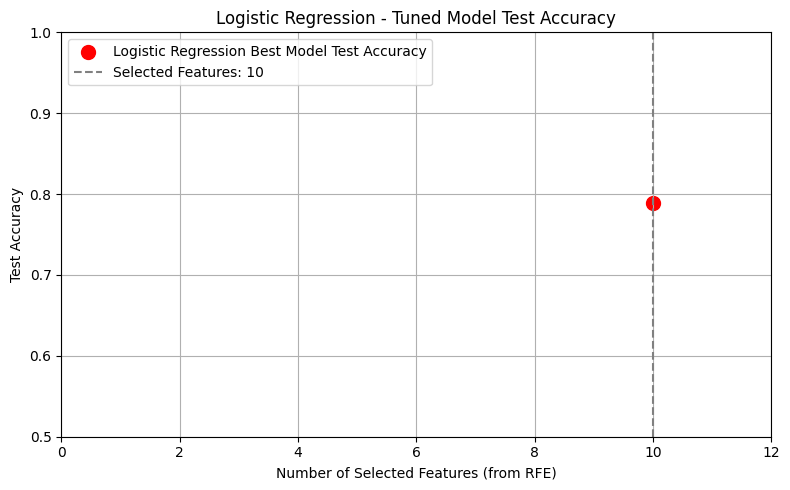


--- Tuning Support Vector Machine with Feature Selection ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- Results for Support Vector Machine ---
Best Parameters: {'classifier__C': np.float64(0.10778765841014329), 'classifier__gamma': np.float64(0.014541533136790553), 'classifier__kernel': 'linear', 'feature_selection__n_features_to_select': 3}
Best Cross-Validation Accuracy: 0.8146
Selected Features: ['Married', 'LoanAmount', 'Credit_History']
Test Accuracy (Tuned Model): 0.7886
Confusion Matrix (Tuned Model):
[[18 25]
 [ 1 79]]
Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



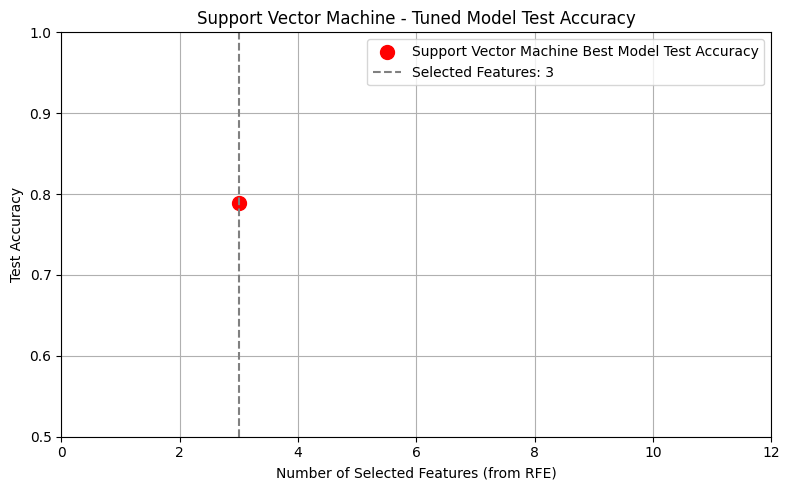


--- Tuning Random Forest with Feature Selection ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- Results for Random Forest ---
Best Parameters: {'classifier__max_depth': np.int64(21), 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 9, 'classifier__n_estimators': 64, 'feature_selection__n_features_to_select': 8}
Best Cross-Validation Accuracy: 0.8125
Selected Features: ['Married', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
Test Accuracy (Tuned Model): 0.7886
Confusion Matrix (Tuned Model):
[[18 25]
 [ 1 79]]
Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



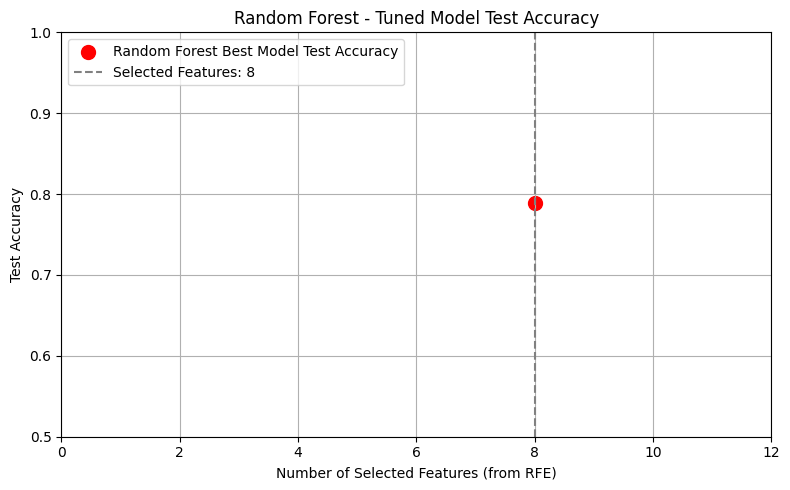


--- Tuning K-Nearest Neighbors with Feature Selection ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- Results for K-Nearest Neighbors ---
Best Parameters: {'classifier__n_neighbors': 13, 'classifier__p': 2, 'classifier__weights': 'uniform', 'feature_selection__n_features_to_select': 7}
Best Cross-Validation Accuracy: 0.8146
Selected Features: ['Gender', 'Married', 'Dependents', 'Education', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']
Test Accuracy (Tuned Model): 0.7886
Confusion Matrix (Tuned Model):
[[18 25]
 [ 1 79]]
Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



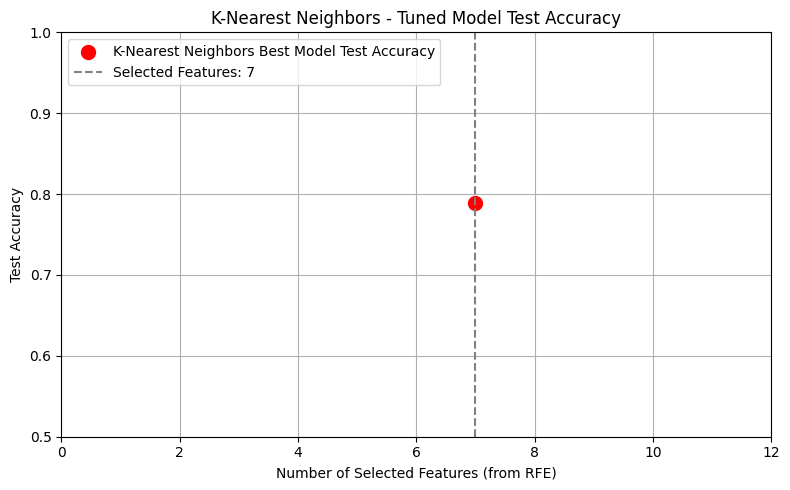

In [ ]:
# Section 11: Pipeline for Feature Selection and Hyperparameter Tuning
# This section creates a pipeline for each of the top 4 classifiers,
# performs feature selection using RFE, and tunes hyperparameters using RandomizedSearchCV.

print("\n--- Section 11: Pipeline for Feature Selection and Hyperparameter Tuning ---")

best_models_results = {}
overall_best_model = None
overall_best_accuracy = 0

for name, base_model in best_4_classifiers.items():
    print(f"\n--- Tuning {name} with Feature Selection ---")

    # Define the RFE estimator based on the classifier type
    # RFE requires an estimator that provides feature importances (coef_ or feature_importances_).
    # SVC with linear kernel and LogisticRegression provide coef_.
    # RandomForestClassifier and DecisionTreeClassifier provide feature_importances_.
    if name == 'Support Vector Machine' or name == 'K-Nearest Neighbors':
        rfe_estimator = LogisticRegression(random_state=RANDOM_STATE, max_iter=200, solver='liblinear') # Use LogisticRegression for RFE
    else:
        # For other models, the base_model itself is fine as RFE can work with them.
        rfe_estimator = base_model

    pipeline = Pipeline([
        ('feature_selection', RFE(estimator=rfe_estimator)),
        ('classifier', base_model)
    ])

    # Define hyperparameter distributions for RandomizedSearchCV
    param_distributions = {}
    if name == 'Logistic Regression':
        param_distributions = {
            'feature_selection__n_features_to_select': randint(3, X_train_scaled.shape[1]),
            'classifier__C': uniform(loc=0.1, scale=10), # Regularization strength
            'classifier__penalty': ['l1', 'l2'],
            'classifier__solver': ['liblinear', 'saga'], # Solvers that support l1/l2
            'classifier__max_iter': randint(100, 500)
        }
    elif name == 'Decision Tree':
        param_distributions = {
            'feature_selection__n_features_to_select': randint(3, X_train_scaled.shape[1]),
            'classifier__max_depth': [None] + list(randint(5, 30).rvs(5)), # None or a range of depths
            'classifier__min_samples_split': randint(2, 20),
            'classifier__min_samples_leaf': randint(1, 10)
        }
    elif name == 'Random Forest':
        param_distributions = {
            'feature_selection__n_features_to_select': randint(3, X_train_scaled.shape[1]),
            'classifier__n_estimators': randint(50, 300),
            'classifier__max_depth': [None] + list(randint(10, 50).rvs(5)), # None or a range of depths
            'classifier__min_samples_split': randint(2, 10),
            'classifier__min_samples_leaf': randint(1, 5)
        }
    elif name == 'Support Vector Machine':
        param_distributions = {
            'feature_selection__n_features_to_select': randint(3, X_train_scaled.shape[1]),
            'classifier__C': uniform(loc=0.1, scale=10),
            'classifier__kernel': ['linear', 'rbf', 'poly'],
            'classifier__gamma': ['scale', 'auto'] + list(uniform(loc=0.001, scale=0.1).rvs(3))
        }
    elif name == 'K-Nearest Neighbors':
        param_distributions = {
            'feature_selection__n_features_to_select': randint(3, X_train_scaled.shape[1]),
            'classifier__n_neighbors': randint(3, 15),
            'classifier__weights': ['uniform', 'distance'],
            'classifier__p': [1, 2] # Manhattan distance (1) or Euclidean distance (2)
        }

    # Setup RandomizedSearchCV
    random_search = RandomizedSearchCV(
        pipeline,
        param_distributions,
        n_iter=20,  # Number of different parameter combinations to try
        cv=5,       # 5-fold cross-validation
        scoring='accuracy',
        random_state=RANDOM_STATE,
        verbose=1,
        n_jobs=-1   # Use all available cores
    )

    # Fit the RandomizedSearchCV model using the scaled training data
    # Note: The pipeline already includes StandardScaler if needed, but for RFE with unscaled data,
    # it's better to scale X_train_scaled before passing to fit.
    # Here, X_train_scaled is already scaled, so it's fine.
    random_search.fit(X_train_scaled, y_train)

    # Get the best model from the search
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_
    best_score = random_search.best_score_

    # Extract selected features from the best pipeline
    # The RFE step is 'feature_selection' in the pipeline
    selected_features_mask = best_model.named_steps['feature_selection'].support_
    selected_features_names = X.columns[selected_features_mask].tolist()

    best_models_results[name] = {
        'model': best_model,
        'best_params': best_params,
        'best_score': best_score,
        'selected_features': selected_features_names
    }

    print(f"\n--- Results for {name} ---")
    print(f"Best Parameters: {best_params}")
    print(f"Best Cross-Validation Accuracy: {best_score:.4f}")
    print(f"Selected Features: {selected_features_names}")

    # Evaluate the best model on the test set
    y_pred_tuned = best_model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred_tuned)
    print(f"Test Accuracy (Tuned Model): {test_accuracy:.4f}")
    print("Confusion Matrix (Tuned Model):")
    print(confusion_matrix(y_test, y_pred_tuned))
    print("Classification Report (Tuned Model):")
    print(classification_report(y_test, y_pred_tuned))

    # Plot accuracy vs. number of selected features for this model (if RFE was used)
    # This requires re-running RFE for different feature counts with the best classifier
    # This is a conceptual plot and might require more complex logic to extract `accuracies_path` from RFE
    # For simplicity, we'll plot the accuracy of the final best model against its selected feature count.
    # A more detailed plot would come from GridSearchCV/RandomizedSearchCV's `cv_results_`
    # For a simple plot, we can reuse the single-feature RFE plot logic if needed.
    # Here, we'll just show the final test accuracy of the best model.
    if test_accuracy > overall_best_accuracy:
        overall_best_accuracy = test_accuracy
        overall_best_model = best_model

    plt.figure(figsize=(8, 5))
    plt.scatter(len(selected_features_names), test_accuracy, color='red', s=100, label=f'{name} Best Model Test Accuracy')
    plt.title(f'{name} - Tuned Model Test Accuracy')
    plt.xlabel('Number of Selected Features (from RFE)')
    plt.ylabel('Test Accuracy')
    plt.xlim(0, X_train_scaled.shape[1] + 1)
    plt.ylim(0.5, 1.0)
    plt.axvline(x=len(selected_features_names), color='gray', linestyle='--', label=f'Selected Features: {len(selected_features_names)}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Section 12: Summarize Best Models and Save Overall Best Model
 This section prints a summary of the best models found and saves the best overall model,

 Its hyperparameters, relevant features, and the scaler using pickle.


In [ ]:

print("\n--- Section 12: Summarizing and Saving Best Models ---")
print("\nSummary of Best Models after Hyperparameter Tuning and Feature Selection:")
for name, results in best_models_results.items():
    print(f"\nModel: {name}")
    print(f"  Best Cross-Validation Accuracy: {results['best_score']:.4f}")
    print(f"  Selected Features: {results['selected_features']}")
    print(f"  Best Parameters: {results['best_params']}")

if overall_best_model:
    print(f"\nOverall Best Model: {overall_best_model.named_steps['classifier'].__class__.__name__}")
    print(f"Overall Best Test Accuracy: {overall_best_accuracy:.4f}")

    # Save the overall best model
    with open('best_loan_prediction_model.pkl', 'wb') as file:
        pickle.dump(overall_best_model, file)
    print("Overall best model saved as 'best_loan_prediction_model.pkl'")

    # Save its hyperparameters
    with open('best_model_hyperparameters.pkl', 'wb') as file:
        pickle.dump(overall_best_model.get_params(), file)
    print("Overall best model hyperparameters saved as 'best_model_hyperparameters.pkl'")

    # Save its relevant features
    # The RFE step is 'feature_selection' in the pipeline
    selected_features_mask_overall = overall_best_model.named_steps['feature_selection'].support_
    overall_selected_features = X.columns[selected_features_mask_overall].tolist()
    with open('best_model_relevant_features.pkl', 'wb') as file:
        pickle.dump(overall_selected_features, file)
    print("Overall best model relevant features saved as 'best_model_relevant_features.pkl'")

    # Save the scaler
    with open('scaler.pkl', 'wb') as file:
        pickle.dump(scaler, file)
    print("StandardScaler saved as 'scaler.pkl'")
else:
    print("No overall best model found. Something might have gone wrong during tuning.")

print("\n--- Code Execution Completed ---")



--- Section 12: Summarizing and Saving Best Models ---

Summary of Best Models after Hyperparameter Tuning and Feature Selection:

Model: Logistic Regression
  Best Cross-Validation Accuracy: 0.8146
  Selected Features: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
  Best Parameters: {'classifier__C': np.float64(3.845401188473625), 'classifier__max_iter': 448, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear', 'feature_selection__n_features_to_select': 10}

Model: Support Vector Machine
  Best Cross-Validation Accuracy: 0.8146
  Selected Features: ['Married', 'LoanAmount', 'Credit_History']
  Best Parameters: {'classifier__C': np.float64(0.10778765841014329), 'classifier__gamma': np.float64(0.07797109050971086), 'classifier__kernel': 'linear', 'feature_selection__n_features_to_select': 3}

Model: Random Forest
  Best Cross-Validation Accuracy: 0.8125
  Selected Fe